# <center>ĐỒ ÁN CUỐI KỲ: KHOA HỌC DỮ LIỆU ỨNG DỤNG</center>

### <center>**Đề tài:** Dự đoán kết quả học tập của học sinh dựa trên việc chơi game</center>

**Nhóm:** Bumblebee - Nhóm 2

**Thành viên**

| MSSV     | Họ và tên       | Github                      |
|----------|-----------------|-----------------------------|
| 19120511 | Võ Văn Hiếu     | https://github.com/vv-hieu  |
| 19120526 | Huỳnh Đức Huy   | https://github.com/KaiKush  |
| 19120539 | Vương Thế Khang | https://github.com/vt-khang |


**Github repository:** https://github.com/vt-khang/KHDLUD-FinalProject

## Import

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set option
pd.set_option('display.max_colwidth', 999)
pd.set_option('float_format', '{:f}'.format)

## A. THU THẬP DỮ LIỆU

### Mục tiêu đề tài

Cuộc thi này nhằm mục đích xác định những cách giúp học sinh tham gia vào nội dung giáo dục bằng hinh thức trò chơi giáo dục, từ đó đưa ra các dự đoán hiệu suất học tập của học sinh. Trong đồ án này sử dụng trò chơi giáo dục trực tuyến [Jo Wilder](https://pbswisconsineducation.org/jowilder/play-the-game) để theo dõi quá trình học tập của học sinh từ lớp 3-5, chủ yếu về các chủ đề lịch sử. Dưới đây là một số yếu tố cốt lõi của trò chơi:
- Nhân vật: Trong trò chơi này, bạn phải tương tác với nhân vật chính (nhân vật người chơi) cùng với các nhân vật khác nhau và ghé thăm nhiều địa điểm khác nhau trên bản đồ để tìm ra manh mối, từ đó giải đáp những bí ẩn liên quan đến lịch sử Wisconsin.
- Điều khiển: Để di chuyển qua các khung cảnh khác nhau, bạn phải sử dụng chuột để click vào nơi bạn muốn di chuyển, điều này cũng tương tự đối với tương tác với các nhân vật (đọc tài liệu, di chuyển, trò chuyện, ...).
- Notebook: Đây là nơi cung cấp thông tin và lưu những phát hiện của từng manh mối bạn có được trong trò chơi.
- Thời gian: Là thời gian bạn dành cho mỗi địa điểm khác nhau tùy thuộc vào cách bạn theo dõi câu chuyện của trò chơi.

### Giới thiệu bộ dữ liệu

Bộ dữ liệu của cuộc thi là dữ liệu về chuỗi thời gian được ghi lại từ trò chơi giáo dục trực tuyến [Jo Wilder](https://pbswisconsineducation.org/jowilder/play-the-game). Trò chơi được chia thành 4 chương, sau mỗi chương người chơi sẽ được trả lời một số câu hỏi. Có tổng cộng 18 câu hỏi liên quan trực tiếp trong trò chơi. Mục tiêu của cuộc thi là sử dụng bộ dữ liệu từ những câu hỏi trên để xác định xem người chơi có trả lời đúng câu hỏi hay không, từ đó có thể đưa ra các kết luận về hiệu suất học tập của học sinh.

Các file dữ liệu này bao gồm:
- **train.csv** - tập train
- **test.csv** - tập test
- **sample_submission.csv** - định dạng file dùng để nộp trên Kaggle
- **train_labels.csv** - câu trả lời cho 18 câu hỏi của mỗi session trong tập train

Cuộc thi: [Predict Student Performance from Game Play](https://www.kaggle.com/competitions/predict-student-performance-from-game-play) \
Nhà tổ chức cuộc thi: [Field Day Lab](https://fielddaylab.wisc.edu) \
Nhà tài trợ: [The Learning Agency Lab](https://www.the-learning-agency-lab.com) \
License: OPEN SOURCE - MIT

### Ứng dụng và ý nghĩa

- Thúc đẩy nghiên cứu về các phương pháp giáo dục, dạy học, tiếp thu kiến thức, ... từ các trò chơi giáo dục.
- Hỗ trợ các nhà phát triển phần mềm trò chơi (Game Developer) để tạo ra thêm nhiều trải nghiệm học tập có hiệu quả hơn cho học sinh.
- Thấy được các lợi ích rộng rãi của các nền tảng học tập dựa trên trò chơi đến với nhiều người hơn.

## B. KHÁM PHÁ DỮ LIỆU

Đầu tiên, ta sẽ xem thử từng tập dữ liệu trông như thế nào.
- Đọc dữ liệu từ file "train.csv" và lưu vào dataframe `raw_train_df`.
- Đọc dữ liệu từ file "test.csv" và lưu vào dataframe `raw_test_df`.
- Đọc dữ liệu từ file "train_labels.csv" và lưu vào dataframe `raw_train_labels_df`.

In [2]:
raw_train_df = pd.read_csv('data/train.csv')
raw_train_df.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.000000,494.000000,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.000000,494.000000,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.000000,494.000000,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.000000,494.000000,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.000000,494.000000,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4


In [3]:
raw_test_df = pd.read_csv('data/test.csv')
raw_test_df.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
0,20090109393214576,0,0,cutscene_click,basic,0,NaN,-413.991405,75.685314,380.000000,...,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0
1,20090109393214576,1,1965,person_click,basic,0,NaN,-105.991405,-63.314686,688.000000,...,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4,0
2,20090109393214576,2,3614,person_click,basic,0,NaN,-418.991405,47.685314,375.000000,...,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4,0
3,20090109393214576,3,5330,person_click,basic,0,NaN,-110.991405,-57.314686,683.000000,...,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4,0
4,20090109393214576,4,6397,person_click,basic,0,NaN,-110.991405,-57.314686,683.000000,...,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_cs_0,0,0,1,0-4,0


In [4]:
raw_train_labels_df = pd.read_csv('data/train_labels.csv')
raw_train_labels_df.head()

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090312455206810_q1,1
3,20090313091715820_q1,0
4,20090313571836404_q1,1


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

Ta sẽ xem thử số dòng và số cột của từng tập dữ liệu trên.

In [5]:
def num_rows_and_cols(df, title):
  num_rows, num_cols = df.shape
  print(f'    {title}\n\t- Số dòng: {num_rows}\n\t- Số cột:  {num_cols}')

num_rows_and_cols(raw_train_df, 'Tập dữ liệu train')
num_rows_and_cols(raw_test_df, 'Tập dữ liệu test')
num_rows_and_cols(raw_train_labels_df, 'Tập dữ liệu train_labels')

    Tập dữ liệu train
	- Số dòng: 26296946
	- Số cột:  20
    Tập dữ liệu test
	- Số dòng: 3728
	- Số cột:  21
    Tập dữ liệu train_labels
	- Số dòng: 424116
	- Số cột:  2


Ta thấy được:
- Dữ liệu của tập train có kích thước **26,296,946 dòng x 20 cột**.
- Dữ liệu của tập test có kích thước **3,728 dòng x 21 cột**.
- Dữ liệu của tập train_labels có kích thước **424,116 x 2 cột**.

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Quan sát sơ các tập dữ liệu trên, ta thấy:
- Mỗi dòng của tập train và tập test chứa thông tin về một sự kiện trong từng index của một session trong trò chơi.
- Mỗi dòng của tập train_labels là câu trả lời cho từng câu hỏi của một session trong trò chơi.

Có vẻ như không có vấn đề các dòng có ý nghĩa khác nhau.

### Dữ liệu có các dòng bị lặp không?

Kiểm tra xem dữ liệu có các dòng bị lặp không và lưu kết quả vào biến `have_duplicated_row`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược lại.

In [6]:
def have_duplicated_dataset(df, title):
  have_duplicated_row = any(df.duplicated())
  print(f'    {title}:\n\t   {have_duplicated_row}')

have_duplicated_dataset(raw_train_df, 'Tập dữ liệu train')
have_duplicated_dataset(raw_test_df, 'Tập dữ liệu test')
have_duplicated_dataset(raw_train_labels_df, 'Tập dữ liệu train_labels')

    Tập dữ liệu train:
	   False
    Tập dữ liệu test:
	   False
    Tập dữ liệu train_labels:
	   False


Như vậy, không có dòng nào bị lặp lại ở các tập dữ liệu trên.

### Mỗi cột có ý nghĩa gì?

Mỗi cột của tập dữ liệu `raw_train_df` có ý nghĩa như sau:
-	**session_id** – id của session sự kiện xảy ra
-	**index** – index của các sự kiện trong session, dùng để phân biệt trong cùng một session
-	**elapsed_time** – khoảng thời gian đã trôi qua (tính bằng ms) giữa thời điểm bắt đầu session cho đến khi sự kiện được ghi lại
-	**event_name** – tên của loại sự kiện
-	**name** – tên sự kiện (ví dụ: xác định xem sự kiện `notebook_click` là đang mở hay đóng cuốn sổ ghi chép)
-	**level** – sự kiện xảy ra ở level nào của trò chơi (từ 0 đến 22)
-	**page** – số trang của sự kiện (chỉ dành cho các sự kiện có liên quan đến notebook)
-	**room_coor_x** – tọa độ x của lần click vào room trong trò chơi (chỉ dành cho các sự kiện click)
-	**room_coor_y** – tọa độ y của lần click vào room trong trò chơi (chỉ dành cho các sự kiện click)
-	**screen_coor_x** – tọa độ x của lần click liên quan đến màn hình của người chơi (chỉ dành cho các sự kiện click)
-	**screen_coor_y** – tọa độ y của lần click liên quan đến màn hình của người chơi (chỉ dành cho các sự kiện click)
-	**hover_duration** – thời lượng hover (tính bằng ms) xảy ra trong bao lâu (chỉ dành cho các sự kiện hover)
-	**text** – văn bản mà người chơi nhìn thấy trong sự kiện này
-	**fqid** – id đầy đủ của sự kiện
-	**room_fqid** – id đầy đủ của room mà sự kiện xảy ra
-	**text_fqid** – id đầy đủ của văn bản
-	**fullscreen** – trò chơi có được mở chế độ toàn màn hình không
-	**hq** – trò chơi có bật chất lượng cao hay không
-	**music** – có bật hay tắt nhạc trong trò chơi không
-	**level_group** – nhóm level và nhóm các câu hỏi (0-4, 5-12, 13-22)

Các cột của tập dữ liệu `raw_test_df` giống với tập dữ liệu train, ngoài ra có thêm 1 cột sau:
- **session_level** - level của session sự kiện (0, 1, 2)

Mỗi cột của tập dữ liệu `raw_train_labels_df` có ý nghĩa như sau:
- **session_id** – id của session sự kiện xảy ra
- **correct** - câu trả lời cho từng câu hỏi của một session

Ta sẽ tập trung vào phần khám phá dữ liệu của tập dữ liệu train.

### Mỗi cột hiện đang có kiểu dữ liệu gì?

Xem thử kiểu dữ liệu của các cột dữ liệu.

In [7]:
raw_train_df.dtypes

session_id          int64
index               int64
elapsed_time        int64
event_name         object
name               object
level               int64
page              float64
room_coor_x       float64
room_coor_y       float64
screen_coor_x     float64
screen_coor_y     float64
hover_duration    float64
text               object
fqid               object
room_fqid          object
text_fqid          object
fullscreen          int64
hq                  int64
music               int64
level_group        object
dtype: object

Hiện tại các cột dữ liệu có kiểu dữ liệu đúng, nên ta chỉ chuyển đổi các cột có ít giá trị khác nhau về dạng category để tối ưu bộ nhớ và tăng tốc độ xử lý dữ liệu. Vì kiểu dữ liệu category sẽ lưu dữ liệu ở dạng mã số thay vì chuỗi ký tự giúp tăng khả năng tối ưu hóa quá trình huấn luyện mô hình.

Như vậy có thể thấy có một số cột đang có kiểu dữ liệu `object` như "event_name", "name", "text", "fqid", "room_fqid", "text_fqid", "level_group". Ta sẽ sử dụng phương pháp tìm số lượng giá trị phân biệt của từng cột và chọn lọc những cột có ít giá trị phân biệt nhất để đưa các cột này về kiểu dữ liệu dạng phân loại `category`.

Với mỗi cột đang có kiểu dữ liệu là `object`. Ta sẽ tính số lượng các giá trị khác nhau (không xét giá trị NaN) và lưu vào dataframe `object_col_df`. Sau đó sắp xếp theo thứ tự giảm dần số lượng các giá trị khác nhau "nunique".

In [8]:
def nunique(s):
  return s.nunique()

object_cols = raw_train_df.select_dtypes(include = 'object').columns
object_col_df = raw_train_df[object_cols].agg([nunique]).T.sort_values('nunique', ascending = False)
object_col_df

,nunique
text,597
fqid,128
text_fqid,126
room_fqid,19
event_name,11
name,6
level_group,3


Từ bảng thống kê trên, ta thấy các cột "event_name", "name", "level_group" nên đổi thành các cột thuộc dạng phân loại (categorical).

Thay đổi kiểu dữ liệu của các cột "event_name", "name", "level_group" sang kiểu dữ liệu dạng `category`.

In [9]:
raw_train_df[['event_name', 'name', 'level_group']] = raw_train_df[['event_name', 'name', 'level_group']].astype('category')

Tương tự như trên, như vậy có thể thấy có một số cột đang có kiểu dữ liệu dạng số `number` như "session_id", "index", "elapsed_time", "level", "page", "room_coor_x", "room_coor_y", "screen_coor_x", "screen_coor_y", "hover_duration", "fullscreen", "hq", "music". Ta sẽ sử dụng phương pháp tìm số lượng giá trị phân biệt của từng cột và chọn lọc những cột có ít giá trị phân biệt nhất để đưa các cột này về kiểu dữ liệu dạng phân loại `category`.

Với mỗi cột đang có kiểu dữ liệu dạng số như `int`, `float`. Ta sẽ tính số lượng các giá trị khác nhau (không xét giá trị NaN) và lưu vào dataframe `number_col_df`. Sau đó sắp xếp theo thứ tự giảm dần số lượng các giá trị khác nhau "nunique".

In [10]:
number_cols = raw_train_df.select_dtypes(include = 'number').columns
number_col_df = raw_train_df[number_cols].agg([nunique]).T.sort_values('nunique', ascending = False)
number_col_df

,nunique
room_coor_x,17438693
room_coor_y,13651023
elapsed_time,5042639
screen_coor_y,102591
screen_coor_x,57924
hover_duration,24101
session_id,23562
index,20348
level,23
page,7


Từ bảng thống kê bên trên, ta có thể thấy:
- Các cột "level", "fullscreen", "hq", "music" đang có kiểu dữ liệu `int`. Ta cần đưa các cột này về dạng `category`.
- Cột "page" đang có kiểu dữ liệu `float`. Ta cần đưa cột này về dạng `category` tương tự như trên.

Thay đổi kiểu dữ liệu của các cột "level", "fullscreen", "hq", "music" sang kiểu dữ liệu dạng `category`.

In [11]:
raw_train_df[['level', 'fullscreen', 'hq', 'music']] = raw_train_df[['level', 'fullscreen', 'hq', 'music']].astype('category')

Thay đổi kiểu dữ liệu của các cột "page" sang kiểu dữ liệu dạng `category`. Do kiểu dữ liệu của cột "page" đang là kiểu dữ liệu `float` nên ta sẽ đưa về kiểu dữ liệu `int` trước rồi mới đổi sang kiểu dữ liệu dạng `category`.

In [12]:
raw_train_df['page'] = raw_train_df['page'].astype('Int64').astype('category')

Xem lại kiểu dữ liệu của các cột dữ liệu sau khi tiền xử lý.

In [13]:
raw_train_df.dtypes

session_id           int64
index                int64
elapsed_time         int64
event_name        category
name              category
level             category
page              category
room_coor_x        float64
room_coor_y        float64
screen_coor_x      float64
screen_coor_y      float64
hover_duration     float64
text                object
fqid                object
room_fqid           object
text_fqid           object
fullscreen        category
hq                category
music             category
level_group       category
dtype: object

Có vẻ các cột đều có kiểu dữ liệu phù hợp. Nếu trong quá trình phân tích dữ liệu cần phải thay đổi kiểu dữ liệu của các cột thì ta sẽ quay lại tiền xử lý ở đây, tạm thời ta chấp nhận kiểu dữ liệu hiện tại của các cột.

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Với mỗi cột numerical, ta sẽ tính số lượng giá trị thiếu, tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị xuất hiện (count), giá trị nhỏ nhất (min), giá trị trung bình (mean), giá trị trung vị (median), giá trị lớn nhất (max), các khoảng tứ phân vị (Q1, Q2, Q3) và độ lệch chuẩn (std). Sau đó ta sẽ lưu các giá trị này vào dataframe `numerical_col_df` thành 11 dòng là "num_missing_val", "ratio_missing_val", "count", "min", "mean", "median", "max", "Q1", "Q2", "Q3", "std".

In [14]:
def num_missing_val(s):
  return s.isna().sum()
def ratio_missing_val(s):
  return s.isna().mean() * 100
def count(s):
  return s.count();
def Q1(s):
  return s.quantile(0.25)
def Q2(s):
  return s.quantile(0.5)
def Q3(s):
  return s.quantile(0.75)

numerical_cols = raw_train_df.select_dtypes(include = 'number').columns
numerical_col_df = raw_train_df[numerical_cols].agg([num_missing_val, ratio_missing_val, count, min, np.mean, np.median, max, Q1, Q2, Q3, np.std]).T
numerical_col_df[['num_missing_val', 'count']] = numerical_col_df[['num_missing_val', 'count']].astype(int)
numerical_col_df

,num_missing_val,ratio_missing_val,count,min,mean,median,max,Q1,Q2,Q3,std
session_id,0,0.000000,26296946,20090312431273200.000000,21132488308433916.000000,21040213470142500.000000,22100221145014656.000000,21010216570082376.000000,21040213470142500.000000,21100516321490164.000000,571295349122915.375000
index,0,0.000000,26296946,0.000000,644.510000,595.000000,20473.000000,288.000000,595.000000,896.000000,545.790000
elapsed_time,0,0.000000,26296946,0.000000,4016693.890000,1014801.000000,1988606704.000000,439700.000000,1014801.000000,1747040.000000,31270320.360000
room_coor_x,2073272,7.880000,24223674,-1992.350000,-54.910000,-11.160000,1261.770000,-352.840000,-11.160000,296.650000,520.290000
room_coor_y,2073272,7.880000,24223674,-918.160000,-116.210000,-97.610000,543.620000,-212.720000,-97.610000,22.690000,218.470000
screen_coor_x,2073272,7.880000,24223674,0.000000,458.410000,447.000000,1919.000000,269.000000,447.000000,663.000000,247.940000
screen_coor_y,2073272,7.880000,24223674,0.000000,385.590000,397.000000,1440.000000,304.000000,397.000000,471.000000,129.820000
hover_duration,24294702,92.390000,2002244,0.000000,3471.000000,419.000000,245163690.000000,99.000000,419.000000,1266.000000,460202.420000


Quan sát bảng thống kê mô tả của các cột có kiểu dữ liệu dạng số (numerical), ta thấy giá trị lớn nhất của 2 cột "screen_coor_x" và "screen_coor_y" là **1919** và **1440**. Điều này có nghĩa là kích thước màn hình trò chơi chỉ đạt tối đa **1919x1440**. Trong khi đó, ta thấy các giá trị của 2 cột "room_coor_x" và "room_coor_y" có xuất hiện giá trị âm. Ta sẽ làm rõ điều này ở bước trực quan hóa dữ liệu.

Ngoài ra, ta thấy có xuất hiện giá trị bị thiếu ở các cột "room_coor_x", "room_coor_y", "screen_coor_x", "screen_coor_y", "hover_duration", trong đó:
- Cột "hover_duration" có tỉ lệ giá trị bị thiếu nhiều nhất **(~92.39%)** so với các cột còn lại.
- Các cột "room_coor_x", "room_coor_y", "screen_coor_x", "screen_coor_y" đều có tỉ lệ giá trị bị thiếu là **7.88%**.
  
Ta sẽ xem thử phân bố các giá trị bị thiếu theo từng loại sự kiện dựa vào cột "event_name".

In [15]:
raw_train_df.groupby(['event_name']).agg(ratio_missing_val)[numerical_cols].round(2)

,session_id,index,elapsed_time,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration
event_name,,,,,,,,
checkpoint,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000
cutscene_click,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
map_click,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
map_hover,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,100.000000,0.000000
navigate_click,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
notebook_click,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
notification_click,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
object_click,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
object_hover,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,100.000000,0.000000


Như vậy có thể thấy:
- Các sự kiện liên quan tới hover (như "map_hover", "object_hover") và sự kiện "checkpoint" thì các cột "room_coor_x", "room_coor_y", "screen_coor_x", "screen_coor_y" thường bị thiếu chung với nhau.
- Các sự kiện liên quan tới hover (như "map_hover", "object_hover") thì cột "hover_duration" không bao giờ bị thiếu giá trị.

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?


Với mỗi cột categorical, ta sẽ tính số lượng giá trị thiếu, tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị xuất hiện (count), giá trị xuất hiện nhiều nhất (mode), số lượng giá trị xuất hiện nhiều nhất (không xét giá trị NaN), số lượng các giá trị khác nhau (không xét giá trị NaN) và danh sách các giá trị khác nhau (không xét giá trị NaN). Sau đó ta sẽ lưu các giá trị này vào dataframe `categical_col_df` thành 6 dòng là "num_missing_val", "ratio_missing_val", "count", "top", "freq", "nunique", "unique".

In [16]:
def unique(s):
  return s.dropna().astype('object').unique()
def top(s):
  return s.mode()[0]
def freq(s):
  return (s == s.mode()[0]).value_counts()[True]

categorical_cols = raw_train_df.select_dtypes(exclude = 'number').columns
categorical_col_df = raw_train_df[categorical_cols].agg([num_missing_val, ratio_missing_val, count, top, freq, nunique, unique]).T
categorical_col_df[['num_missing_val', 'count']] = categorical_col_df[['num_missing_val', 'count']].astype(int)
categorical_col_df

,num_missing_val,ratio_missing_val,count,top,freq,nunique,unique
event_name,0,0.000000,26296946,navigate_click,11326433,11,"[cutscene_click, person_click, navigate_click, observation_click, notification_click, object_click, object_hover, map_hover, map_click, checkpoint, notebook_click]"
name,0,0.000000,26296946,undefined,12705785,6,"[basic, undefined, close, open, prev, next]"
level,0,0.000000,26296946,18,3499163,23,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]"
page,25732402,97.853196,564544,5,101171,7,"[0, 1, 3, 4, 5, 6, 2]"
text,16679807,63.428685,9617139,undefined,355969,597,"[undefined, Whatcha doing over there, Jo?, Just talking to Teddy., I gotta run to my meeting!, Can I come, Gramps?, Sure thing, Jo. Grab your notebook and come upstairs!, See you later, Teddy., I get to go to Gramps's meeting!, Now where did I put my notebook?, \u00f0\u0178\u02dc\u00b4, I love these photos of me and Teddy!, Found it!, Gramps is in trouble for losing papers?, This can't be right!, Gramps is a great historian!, Hmm. Button's still not working., Let's get started. The Wisconsin Wonders exhibit opens tomorrow!, Who wants to investigate the shirt artifact?, Not Leopold here. He's been losing papers lately., Hey!, It's true, they do keep going missing lately., See?, Besides, I already figured out the shirt., It's a women's basketball jersey!, That settles it., Wells, finish up your report., Leopold, why don't you help me set up in the Capitol?, We need to talk about that missing paperwork., Will do, Boss., Hey Jo, let's take a look at the shirt!, Your grampa is waiting ..."
fqid,8274415,31.465308,18022531,worker,1878958,128,"[intro, gramps, teddy, photo, notebook, retirement_letter, tobasement, janitor, toentry, groupconvo, report, boss, wells, directory, tocollection, cs, tunic, tunic.hub.slip, tostacks, outtolunch, tocloset, tomap, tunic.historicalsociety, tunic.kohlcenter, plaque, plaque.face.date, togrampa, tunic.capitol_0, chap1_finale, chap1_finale_c, tocloset_dirty, what_happened, trigger_scarf, trigger_coffee, tunic.capitol_1, tofrontdesk, archivist, magnify, tunic.humanecology, worker, businesscards, businesscards.card_0.next, businesscards.card_1.next, businesscards.card_bingo.next, businesscards.card_bingo.bingo, tohallway, tunic.drycleaner, logbook, logbook.page.bingo, tunic.library, tomicrofiche, reader, reader.paper0.next, reader.paper1.next, reader.paper2.bingo, wellsbadge, journals, journals.hub.topics, journals.pic_0.next, journals.pic_1.next, journals.pic_2.bingo, chap2_finale_c, ch3start, seescratches, tocage, glasses, directory.closeup.archivist, key, unlockdoor, confrontation, sav..."
room_fqid,0,0.000000,26296946,tunic.historicalsociety.entry,3622003,19,"[tunic.historicalsociety.closet, tunic.historicalsociety.basement, tunic.historicalsociety.entry, tunic.historicalsociety.collection, tunic.historicalsociety.stacks, tunic.kohlcenter.halloffame, tunic.capitol_0.hall, tunic.historicalsociety.closet_dirty, tunic.historicalsociety.frontdesk, tunic.humanecology.frontdesk, tunic.drycleaner.frontdesk, tunic.library.frontdesk, tunic.library.microfiche, tunic.capitol_1.hall, tunic.historicalsociety.cage, tunic.historicalsociety.collection_flag, tunic.wildlife.center, tunic.flaghouse.entry, tunic.capitol_2.hall]"
text_fqid,16679702,63.428286,9617244,tunic.historicalsociety.cage.confrontation,666557,126,"[tunic.historicalsociety.closet.intro, tunic.historicalsociety.closet.gramps.intro_0_cs_0, tunic.historicalsociety.closet.teddy.intro_0_cs_0, tunic.historicalsociety.closet.teddy.intro_0_cs_5, tunic.historicalsociety.closet.photo, tunic.historicalsociety.closet.notebook, tunic.historicalsociety.closet.retirement_letter.hub, tunic.historicalsociety.basement.janitor, tunic.historicalsociety.entry.groupconvo, tunic.historicalsociety.entry.boss.talktogramps, tunic.historicalsociety.entry.wells.talktogramps, tunic.historicalsociety.collection.cs, tunic.historicalsociety.collection.tunic.slip, tu

Ta thấy có xuất hiện giá trị bị thiếu ở các cột "page", "text", "fqid", "text_fqid", trong đó:
- Cột "page" có tỉ lệ giá trị bị thiếu nhiều nhất **(~97.86%)** so với các cột còn lại.
- Các cột "text" và "text_fqid" đều có tỉ lệ giá trị bị thiếu là **63.43%**.
- Cột "fqid" có tỉ lệ giá trị bị thiếu ít nhất **(~31.47%)** so với các cột còn lại.
  
Ta sẽ xem thử giá trị bị thiếu ở từng loại sự kiện dựa vào cột "event_name".

In [17]:
raw_train_df.groupby(['event_name']).agg(ratio_missing_val)[categorical_cols.drop(['event_name'])].round(2)

,name,level,page,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
event_name,,,,,,,,,,,
checkpoint,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
cutscene_click,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
map_click,0.000000,0.000000,100.000000,100.000000,14.440000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
map_hover,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
navigate_click,0.000000,0.000000,100.000000,100.000000,61.680000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
notebook_click,0.000000,0.000000,0.000000,100.000000,100.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
notification_click,0.000000,0.000000,100.000000,0.010000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
object_click,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
object_hover,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000


Như vậy có thể thấy:
- Sự kiện liên quan tới notebook (như "notebook_click") thì cột "page" không bao giờ bị thiếu giá trị.
- Các sự kiện như "cutscene_click", "notification_click", "observation_click", "person_click" thì các cột "text" và "text_fqid" thường bị thiếu chung với nhau.

## C. ĐẶT CÂU HỎI

### Câu 1: Người học sử dụng thời gian như thế nào theo từng nhóm level?

### Câu 2: Cách điều khiển trong trò chơi có thuận tiện đối với học sinh hay không?

### Câu 3: Các hành vi tương tác qua các sự kiện có ảnh hưởng như thế nào?

## D. TRỰC QUAN HÓA DỮ LIỆU

### Biểu diễn sự phân bố của dữ liệu

Để làm rõ điều này, ta sẽ dùng các biểu đồ boxplot đối với các cột dạng số (numerical) để thể hiện sự phân bố của dữ liệu. Trong đó:
- Các cạnh bên trái và bên phải của hình hộp tương ứng với khoảng tứ phân vị thứ nhất (Q1) và khoảng tứ phân vị thứ ba (Q3).
- Đường ở giữa hình hộp tương ứng với khoảng tứ phân vị thứ hai (Q2), hay còn gọi là giá trị trung bình (mean).
- Các giá trị ngoài đường giới hạn cận bên trái sẽ có giá trị nhỏ hơn Q1 - 1.5*IQR.
- Các giá trị ngoài đường giới hạn cận bên phải sẽ có giá trị lớn hơn Q3 + 1.5*IQR.
- Các chấm còn lại nằm ở bên ngoài cận bên trái và cận bên phải là các outlier xuất hiện trong tập dữ liệu.

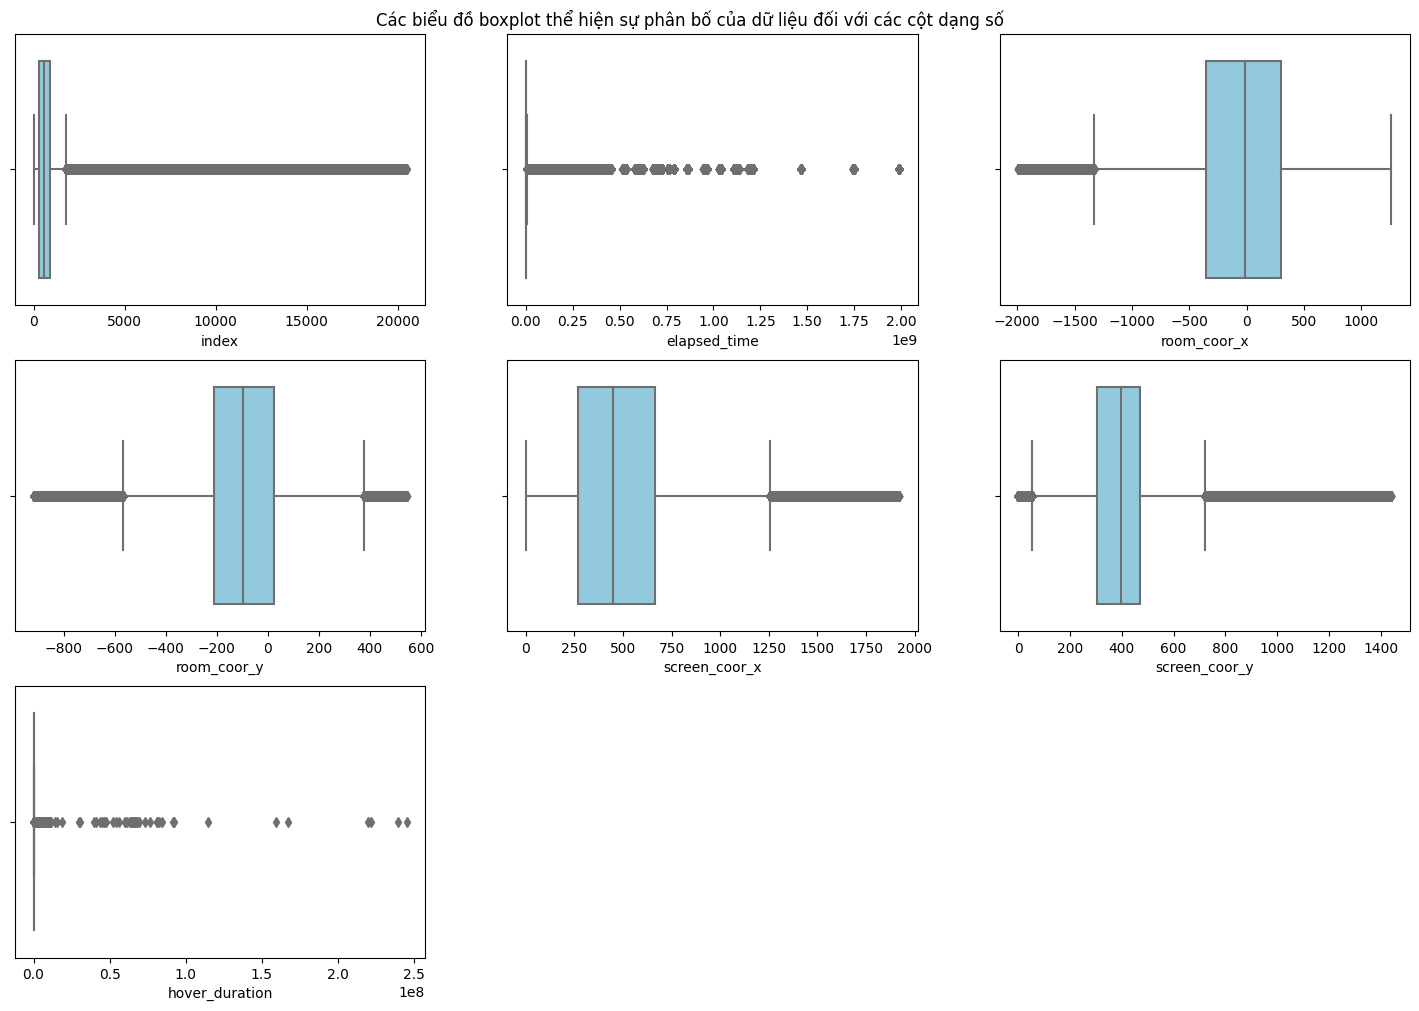

In [18]:
fig, axs = plt.subplots(3, 3, figsize = (18, 12))
row, col = 0, 0
for numerical_col in numerical_cols.drop(['session_id']):
  sns.boxplot(data = raw_train_df, x = numerical_col, color = 'skyblue', ax = axs[row, col])
  plt.grid()
  col += 1
  if col >= 3:
    col = 0
    row += 1
fig.delaxes(axs[2, 1])
fig.delaxes(axs[2, 2])
plt.suptitle('Các biểu đồ boxplot thể hiện sự phân bố của dữ liệu đối với các cột dạng số', y = 0.9)
plt.show()

**Nhận xét:** Quan sát các biểu đồ trên, ta nhận thấy được một số điểm nổi bật sau:
- Hầu hết các cột của dữ liệu đều có xuất hiện outlier, một số cột có xuất hiện khá nhiều outlier như "index", "elapsed_time", "hover_duration" thì dữ liệu đều có xu hướng nghiêng nhiều về bên phải. Lấy ví dụ cột "hover_duration" cho ta biết được đa phần người học không mất nhiều thời gian cho các sự kiện hover, dễ thấy phần lớn dữ liệu tập trung nhiều ở phía bên trái biểu đồ, hay nói cách khác hầu hết người chơi di chuyển một số vật phẩm hoặc giao diện khác trong vòng chưa đầy 5000 ms.
- Cột "room_coor_x" có xuất hiện nhiều outlier ở phía bên trái cho thấy sự tương tác với các sự kiện click vào room trong trò chơi thường không xảy ra nhiều ở phía bên trái màn hình room. Tương tự với cột "room_coor_y" có xuất hiện outlier ở cả phía bên trái và bên phải, điều này cho thấy các sự kiện click vào room trong trò chơi thường không xảy ra nhiều ở phía bên trên và bên dưới màn hình room.
- Cột "screen_coor_x" có xuất hiện nhiều outlier ở phía bên phải cho thấy sự tương tác với các sự kiện click vào màn hình trò chơi thường không xảy ra nhiều ở phía bên phải màn hình. Tương tự với cột "screen_coor_y" có xuất hiện nhiều outlier ở bên phải, điều này cho thấy các sự kiện click vào màn hình trò chơi thường không xảy ra nhiều ở phía bên trên màn hình trò chơi.

Tiếp theo, ta sẽ dùng các biểu đồ tròn đối với các cột dạng phân loại (categorical) để thể hiện sự phân bố của dữ liệu, ở đây ta chỉ xét các cột "page", "fullscreen", "hq", "music", "level_group".

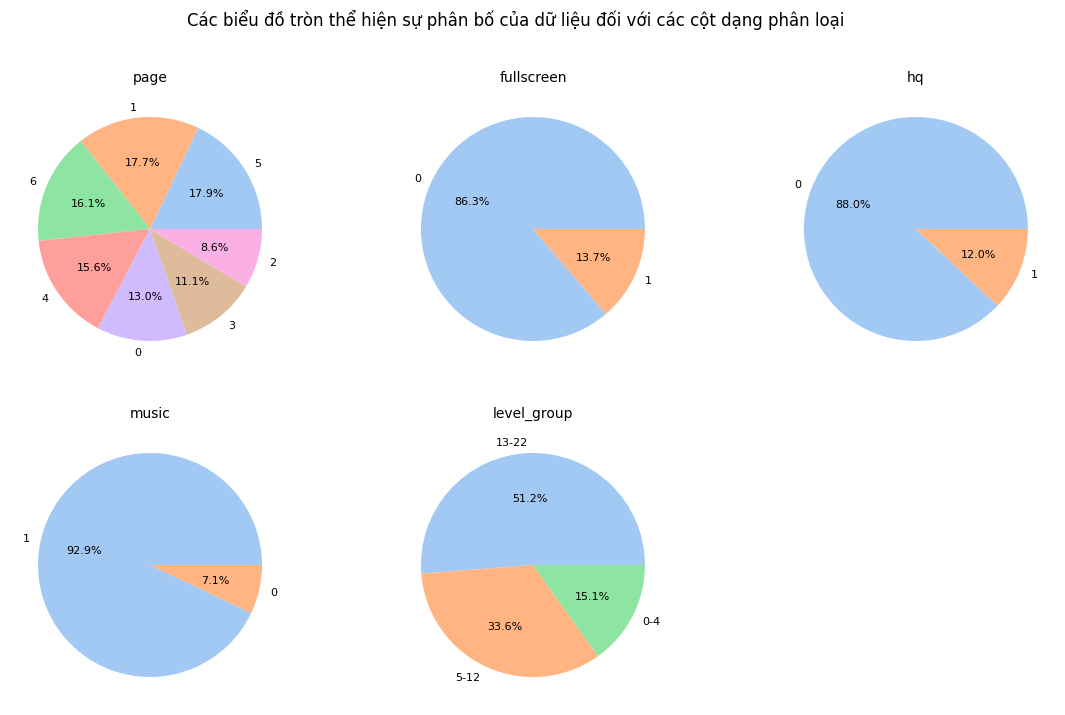

In [19]:
fig, axs = plt.subplots(2, 3, figsize = (14, 8))
row, col = 0, 0
for categorical_col in raw_train_df.select_dtypes(include = 'category').columns.drop(['event_name', 'name', 'level']):
  axs[row, col].pie(raw_train_df[categorical_col].value_counts(), labels = raw_train_df[categorical_col].value_counts().index, colors = sns.color_palette('pastel'), autopct = '%1.1f%%', textprops = {'fontsize': 8})
  axs[row, col].set_title(categorical_col, fontsize = 10)
  col += 1
  if col >= 3:
    col = 0
    row += 1
fig.delaxes(axs[1, 2])
plt.suptitle('Các biểu đồ tròn thể hiện sự phân bố của dữ liệu đối với các cột dạng phân loại')
plt.show()

**Nhận xét:** Quan sát các biểu đồ trên, ta nhận thấy được một số điểm nổi bật sau:
- Đa số người học chọn không mở trò chơi ở chế độ toàn màn hình **(fullscreen)**, chiếm **~86.3%** và chọn không bật trò chơi ở chất lượng cao **(hq)**, chiếm **~88%**. Trong khi đó, đa số người học đều chọn mở nhạc của trò chơi **(music)** với tỉ lệ phần trăm khá cao, chiếm **~92.9%**. Điều này cũng dễ hiểu vì đa phần người học ở độ tuổi từ lớp 3-5, với những người ở độ tuổi thì âm nhạc có thể tạo được sự hứng thú trong quá trình chơi game, từ đó tăng thêm trải nghiệm tham gia trò chơi.
- Về sự phân bố các trang trong notebook **(page)** có thể thấy tỉ lệ phần trăm các trang trong dữ liệu được phân bố đều nhau, trong đó **~13%** thuộc page 0, **~17.7%** thuộc page 1, **~8.6%** thuộc page 2, **~11.1%** thuộc page 3, **~15.6%** thuộc page 4, **~17.9%** thuộc page 5 và **~16.1%** thuộc page 6.
- Về các nhóm level **(level_group)**, số lượng sự kiện trong nhóm level thứ ba (13-22) có tỉ lệ phần trăm cao nhất, chiếm **~51.2%**. Sau đó là nhóm level thứ hai (5-12), chiếm **~33.6%**. Cuối cùng là nhóm level thứ nhất (0-5), chiếm **~15.1%**, điều này cũng dễ hiểu vì các phân bố số lượng level trong từng nhóm level **(level_group)** là khác nhau dẫn đến số lượng sự kiện theo từng nhóm level là khác nhau, ví dụ nhóm level thứ nhất (0-4) có 5 level, nhóm level thứ hai (5-12) có 8 level và nhóm level thứ ba (13-22) có 10 level, do đó số lượng level trong từng nhóm level **(level_group)** càng nhiều thì tỉ lệ phần trăm càng cao. Hơn nữa việc hầu hết các câu hỏi đều thuộc từ level 13 đến level 22 vì chúng thách thức người chơi tìm ra các manh mối phức tạp hơn dẫn tới có nhiều sự kiện xảy ra ở đây hơn trong trò chơi.

Cuối cùng, ta sẽ dùng biểu đồ tròn đối để thể hiện sự phân bố của dữ liệu trong thuộc tính nhãn (được lấy từ cột "correct" của tập dữ liệu `raw_train_labels_df`). Trong đó:
- Màu xanh dương: thể hiện cho các câu trả lời đúng (1).
- Màu cam: thể hiện cho các câu trả lời sai (0).

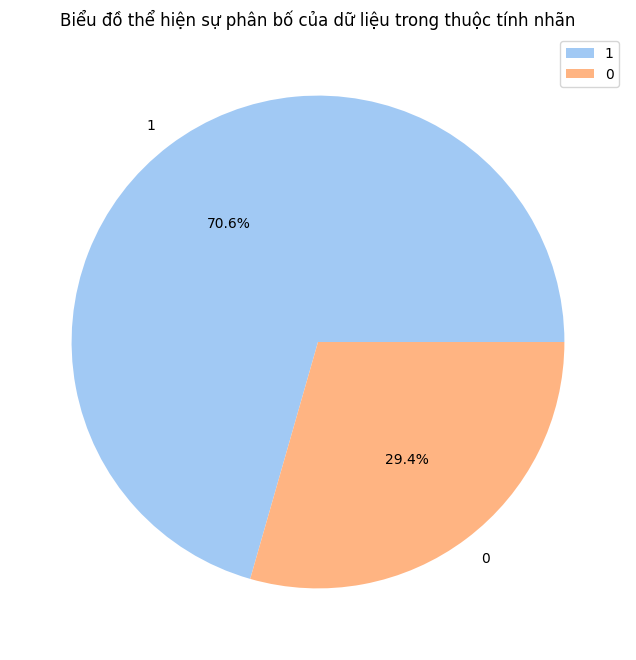

In [20]:
plt.figure(figsize = (12, 8))
plt.pie(raw_train_labels_df['correct'].value_counts(), labels = raw_train_labels_df['correct'].value_counts().index, colors = sns.color_palette('pastel'), autopct = '%1.1f%%')
plt.title('Biểu đồ thể hiện sự phân bố của dữ liệu trong thuộc tính nhãn')
plt.legend()
plt.show()

**Nhận xét:** Quan sát biểu đồ trên cho thấy có **~70.6%** học sinh trả lời đúng các câu hỏi được đưa ra, trong khi đó có **~29.4%** còn lại trả lời sai các câu hỏi. Điều này cho ta biết mức độ tập trung học tập của học sinh trong suốt quá trình chơi game ở mức ổn định, tức là học sinh có theo dõi và thu thập các thông tin từ những manh mối để trả lời câu hỏi, do đó tỉ lệ trả lời đúng cao hơn.

### Người học sử dụng thời gian như thế nào theo từng nhóm level?

Để trả lời cho câu hỏi này, ta sẽ dùng biểu đồ đường để thể hiện khoảng thời gian dùng cho việc học của một học sinh theo từng nhóm level, tuy nhiên ta chỉ xét trong trường hợp session đầu tiên. Trong đó:
- Trục tung: khoảng thời gian đã trôi qua (tính bằng ms) giữa thời điểm bắt đầu session cho đến khi sự kiện được ghi lại **(elapsed_time)**.
- Trục hoành: index của các sự kiện trong cùng một session **(index)**.

Các màu sắc thể hiện cho từng nhóm level **(level_group)**. Trong đó:
- Màu xanh dương: từ level 0 đến level 4 (0-4).
- Màu xanh lá: từ level 5 đến level 12 (5-12).
- Màu cam: từ level 13 đến level 22 (13-22).

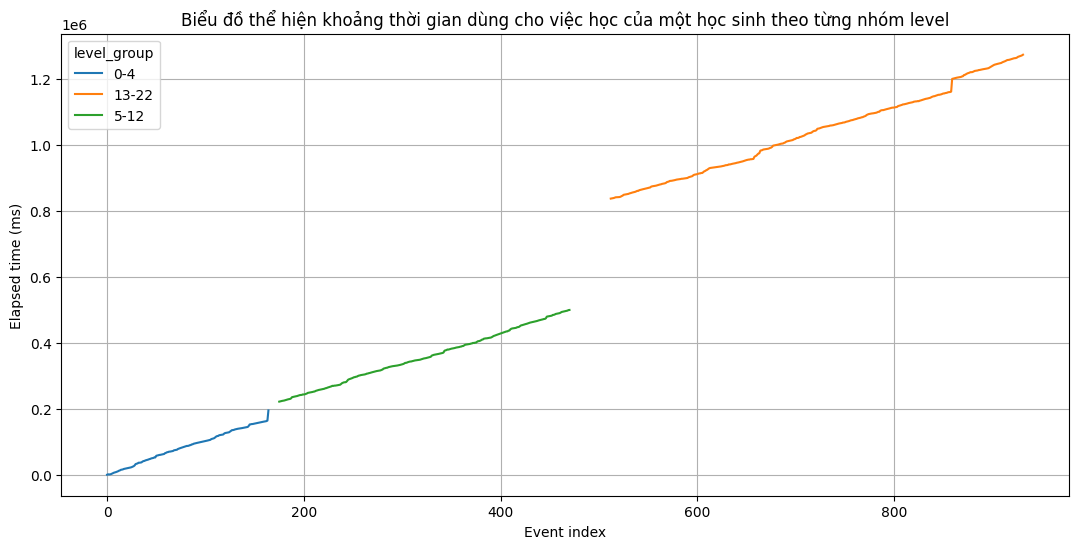

In [21]:
first_df = raw_train_df[raw_train_df['session_id'] == 20090312431273200]
plt.figure(figsize = (13, 6))
sns.lineplot(data = first_df, x = 'index', y = 'elapsed_time', hue = 'level_group')
plt.grid()
plt.xlabel('Event index')
plt.ylabel('Elapsed time (ms)')
plt.title('Biểu đồ thể hiện khoảng thời gian dùng cho việc học của một học sinh theo từng nhóm level')
plt.show()

**Nhận xét:** Quan sát biểu đồ trên cho thấy khoảng thời gian dùng cho việc học **tăng lên** theo từng level. Đặc biệt, ở phần chuyển tiếp giữa nhóm level thứ 2 (5-12) và nhóm level thứ 3 (13-22), khoảng cách về thời gian cao hơn so với nhóm level thứ 1 (0-4). Điều này có liên quan đến thời gian được sử dụng để trả lời các câu hỏi giữa mỗi phần, cụ thể các câu hỏi ở giữa nhóm level thứ 1 (0-4) và nhóm level thứ 2 (5-12) có phần dễ hơn nên người chơi thường sẽ không mất nhiều thời gian. Trong khi đó các câu hỏi ở giữa nhóm level thứ 2 (5-12) và nhóm level thứ 3 (13-22) có thể sẽ gây khó dễ cho người chơi nhiều hơn nên sẽ mất nhiều thời gian hơn.

### Cách điều khiển trong trò chơi có thuận tiện đối với học sinh hay không?

Để trả lời cho câu hỏi này, ta sẽ dùng biểu đồ scatter để thể hiện các lần click vào room trong trò chơi của một học sinh theo từng nhóm level, tuy nhiên ta chỉ xét trong trường hợp session đầu tiên. Trong đó:
- Trục tung: tọa độ y của lần click vào room trong trò chơi (chỉ dành cho các sự kiện click) **(room_coor_y)**.
- Trục hoành: tọa độ x của lần click vào room trong trò chơi (chỉ dành cho các sự kiện click) **(room_coor_x)**.

Các màu sắc thể hiện cho từng nhóm level **(level_group)**. Trong đó:
- Màu xanh dương: từ level 0 đến level 4 (0-4).
- Màu xanh lá: từ level 5 đến level 12 (5-12).
- Màu cam: từ level 13 đến level 22 (13-22).

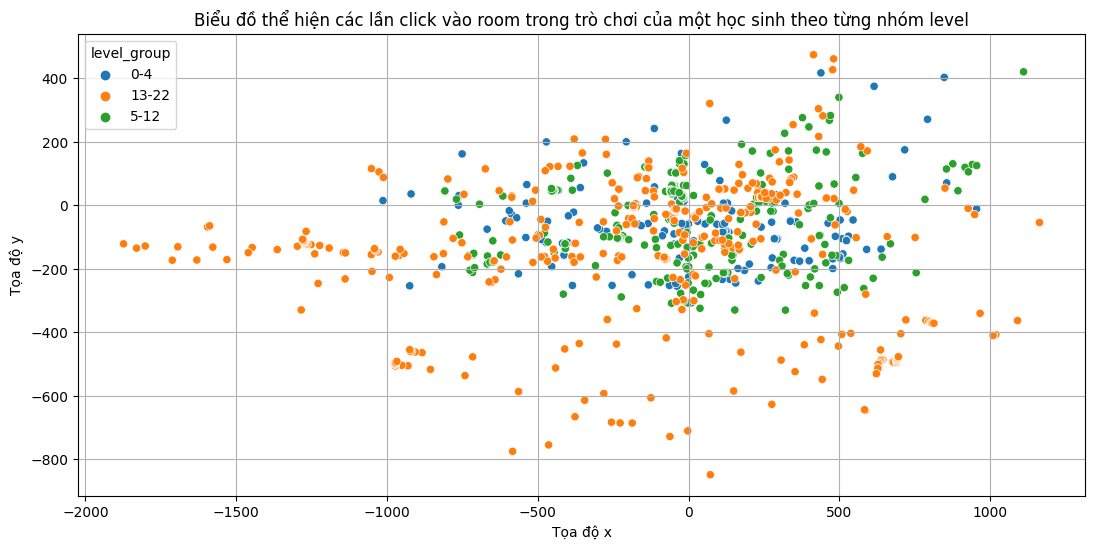

In [22]:
plt.figure(figsize = (13, 6))
sns.scatterplot(data = first_df, x = 'room_coor_x', y = 'room_coor_y', hue = 'level_group')
plt.grid()
plt.xlabel('Tọa độ x')
plt.ylabel('Tọa độ y')
plt.title('Biểu đồ thể hiện các lần click vào room trong trò chơi của một học sinh theo từng nhóm level')
plt.show()

**Nhận xét:** Quan sát biểu đồ trên cho thấy các lần click vào room trong trò chơi ở các nhóm level thứ 1 (0-4) và nhóm level thứ 2 (5-12) phân bố tập trung ở **trung tâm** màn hình hơn. Trong khi đó ở nhóm level thứ 3 (13-22), các lần click này lại tập trung nhiều vào ở **phần dưới và phần bên trái** màn hình hơn. Điều này có thể do mức độ khó của trò chơi ở 2 nhóm level ban đầu tập trung vào việc làm quen dần với cách điều khiển trò chơi nên phân bố các room ở 2 nhóm level ban đầu thường sẽ dễ phát hiện hơn. Trong khi đó ở nhóm level thứ 3 (13-22) thì độ khó của trò chơi được nâng lên vào có một số room được ẩn giấu để người chơi khó phát hiện, do vậy việc phân bố room ở **phần dưới và phần bên trái** màn hình trò chơi cũng là điều dễ hiểu.

Ta sẽ dùng thêm biểu đồ scatter để thể hiện các lần click vào màn hình trò chơi của một học sinh theo từng nhóm level, tuy nhiên ta chỉ xét trong trường hợp session đầu tiên. Trong đó:
- Trục tung: tọa độ y của lần click liên quan đến màn hình của người chơi (chỉ dành cho các sự kiện click) **(screen_coor_y)**.
- Trục hoành: tọa độ x của lần click liên quan đến màn hình của người chơi (chỉ dành cho các sự kiện click) **(screen_coor_x)**.

Các màu sắc thể hiện cho từng nhóm level **(level_group)**. Trong đó:
- Màu xanh dương: từ level 0 đến level 4 (0-4).
- Màu xanh lá: từ level 5 đến level 12 (5-12).
- Màu cam: từ level 13 đến level 22 (13-22).

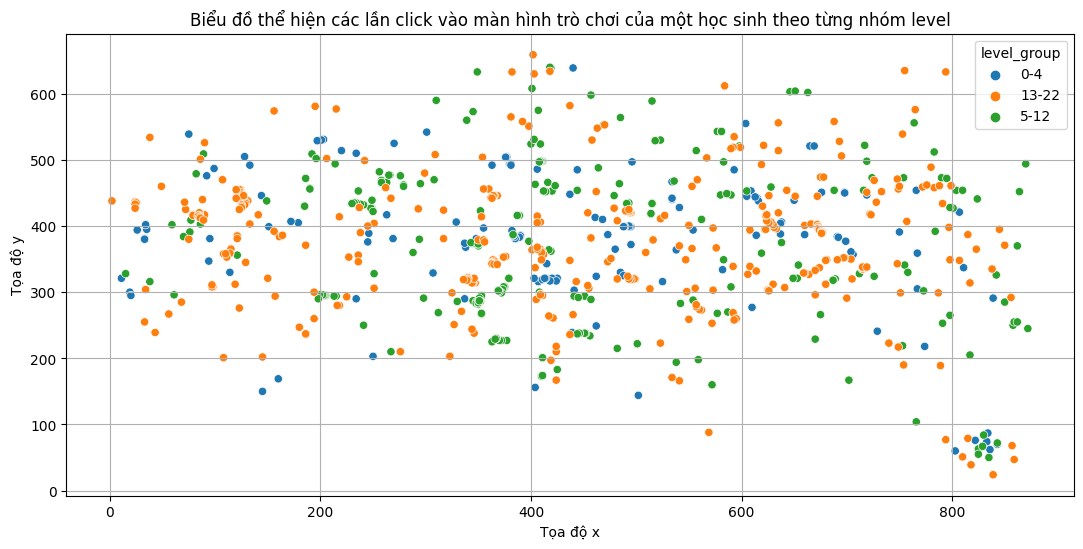

In [23]:
plt.figure(figsize = (13, 6))
sns.scatterplot(data = first_df, x = 'screen_coor_x', y = 'screen_coor_y', hue = 'level_group')
plt.grid()
plt.xlabel('Tọa độ x')
plt.ylabel('Tọa độ y')
plt.title('Biểu đồ thể hiện các lần click vào màn hình trò chơi của một học sinh theo từng nhóm level')
plt.show()

**Nhận xét:** Quan sát biểu đồ trên cho thấy kích thước màn hình trò chơi chỉ có thể đạt tối đa **1919x1440**, các lần click vào màn hình trò chơi phân bố rải rác khắp nơi. Đồng thời có một số lượng nhỏ các lần click tập trung ở phía dưới bên phải màn hình, điều này cho thấy đây là vị trí của các nút bấm qua màn.

Ngoài ra, quan sát cả 2 biểu đồ trên ta thấy kích thước màn hình room có chứa giá trị âm còn kích thước màn hình trò chơi thì không, điều này có thể là do kích thước của màn hình trò chơi là cố định nên ta sẽ lấy tọa độ gốc của màn hình (có tọa độ x = 0 và y = 0) ở **góc dưới cùng bên trái** màn hình, còn kích thước của màn hình room luôn thay đổi khác nhau đối với các địa điểm khác nhau nên ta sẽ lấy tọa độ gốc của màn hình (có tọa độ x = 0 và y = 0) ở **chính giữa trung tâm** màn hình.

### Các hành vi tương tác qua các sự kiện có ảnh hưởng như thế nào?

Để trả lời cho câu hỏi này, ta cần có cái nhìn tổng quan về phân bố theo các loại sự kiện và theo tên sự kiện.

Đầu tiên, ta sẽ dùng biểu đồ cột để thể hiện phân bố số lượng các loại sự kiện theo từng nhóm level. Trong đó:
- Trục hoành: thể hiện các loại sự kiện **(event_name)**.
- Trục tung: thể hiện số lượng theo từng loại sự kiện.

Các màu sắc thể hiện cho từng nhóm level **(level_group)**. Trong đó:
- Màu xanh dương: từ level 0 đến level 4 (0-4).
- Màu xanh lá: từ level 5 đến level 12 (5-12).
- Màu cam: từ level 13 đến level 22 (13-22).

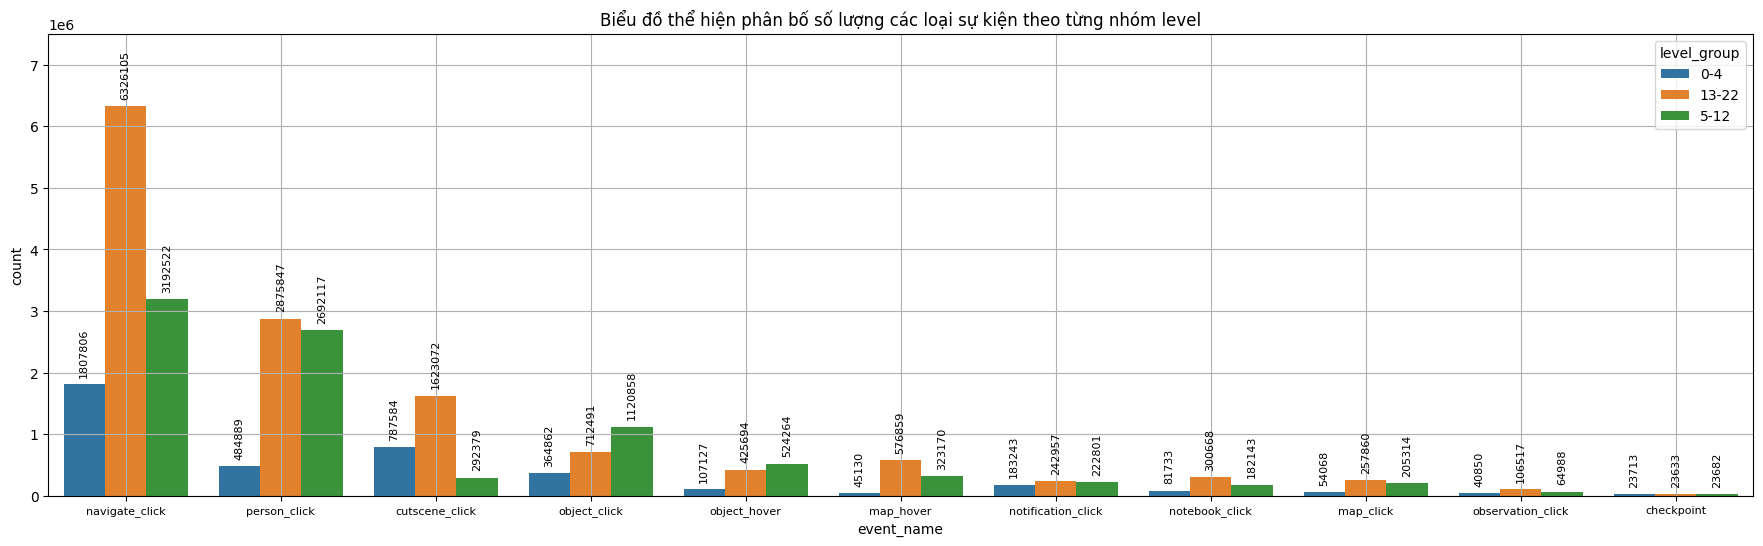

In [24]:
fig, ax = plt.subplots(figsize = (22, 6))
sns.countplot(data = raw_train_df, x = 'event_name', hue = 'level_group', order = raw_train_df['event_name'].value_counts().index, ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 8)
ax.bar_label(ax.containers[0], rotation = 90, fontsize = 8, fmt = '%.f', padding = 5)
ax.bar_label(ax.containers[1], rotation = 90, fontsize = 8, fmt = '%.f', padding = 5)
ax.bar_label(ax.containers[2], rotation = 90, fontsize = 8, fmt = '%.f', padding = 5)
plt.grid()
plt.ylim(0, 7.5e6)
plt.title('Biểu đồ thể hiện phân bố số lượng các loại sự kiện theo từng nhóm level')
plt.show()

Ở đây ta sẽ làm rõ ý nghĩa của từng loại sự kiện như sau:
- **checkpoint** - sự kiện chuyển sang chương mới, chỉ xuất hiện sau khi kết thúc một nhóm level
- **cutscene_click** - sự kiện click để nói chuyện với các nhân vật khác
- **map_click** - sự kiện click vào bản đồ (chỉ dành cho các sự kiện có liên quan đến bản đồ)
- **map_hover** - sự kiện hover vào bản đồ (chỉ dành cho các sự kiện có liên quan đến bản đồ)
- **navigate_click** - sự kiện click để điều hướng nhân vật người chơi (ví dụ: di chuyển nhân vật, thu thập manh mối, nói chuyện, ...)
- **notebook_click** - sự kiện click trong notebook (chỉ dành cho các sự kiện có liên quan đến notebook)
- **notification_click** - sự kiện click đưa ra các thông báo cho người chơi
- **object_click** - sự kiện click vào các manh mối trong trò chơi
- **object_hover** - sự kiện hover vào các manh mối trong trò chơi
- **observation_click** - sự kiện click vào các đồ vật khác để tìm ra một số manh mối
- **person_click** - sự kiện click vào các nhân vật khác, có liên quan đến hướng dẫn người chơi hoặc giao nhiệm vụ

**Nhận xét:** Quan sát biểu đồ trên, ta nhận thấy được một số điểm nổi bật sau:
- Phân bố của sự kiện **navigate_click** chiếm nhiều nhất (trong đó **1,807,806** mẫu thuộc nhóm level thứ nhất (0-4), **3,192,522** mẫu thuộc nhóm level thứ hai (5-12) và **6,326,105** mẫu thuộc nhóm level thứ ba (13-22)), trong khi đó phân bố của sự kiện **checkpoint** chiếm ít nhất (trong đó **23,713** mẫu thuộc nhóm level thứ nhất (0-4), **23,682** mẫu thuộc nhóm level thứ hai (5-12) và **23,633** mẫu thuộc nhóm level thứ ba (13-22)). Điều này cho thấy hầu hết các học sinh chơi game chủ yếu sử dụng sự kiện **navigate_click** để điều hướng nhân vật người chơi, thu thập đồ vật nhằm tìm kiếm manh mối hoặc nói chuyện với các nhân vật khác có mặt trong trò chơi, do vậy số lượng sự kiện **navigate_click** chiếm nhiều nhất. Ngoài ra, sự kiện **checkpoint** chỉ xuất hiện sau khi kết thúc một nhóm level và chuyển sang chương mới, do vậy số lượng sự kiện **checkpoint** chiếm ít nhất.
- Về phân bố theo nhóm level của các sự kiện, trong đó nhóm level thứ hai (5-12) chiếm tỉ lệ cao nhất ở một số sự kiện như "object_click", "object_hover", các sự kiện còn lại thì nhóm level thứ ba (13-22) luôn chiếm tỉ lệ cao nhất, sau đó tới nhóm level thứ hai (5-12) và cuối cùng là nhóm level thứ nhất (0-4). Lí do tương tự như trên, vì số lượng các level trong từng nhóm khác nhau ít nhiều dẫn tới số lượng sự kiện trong từng nhóm cũng có sự chênh lệch.

Tiếp theo, ta sẽ dùng biểu đồ cột để thể hiện phân bố số lượng tên sự kiện theo từng nhóm level. Trong đó:
- Trục hoành: thể hiện tên sự kiện **(name)**.
- Trục tung: thể hiện số lượng theo từng tên sự kiện.

Các màu sắc thể hiện cho từng nhóm level **(level_group)**. Trong đó:
- Màu xanh dương: từ level 0 đến level 4 (0-4).
- Màu xanh lá: từ level 5 đến level 12 (5-12).
- Màu cam: từ level 13 đến level 22 (13-22).

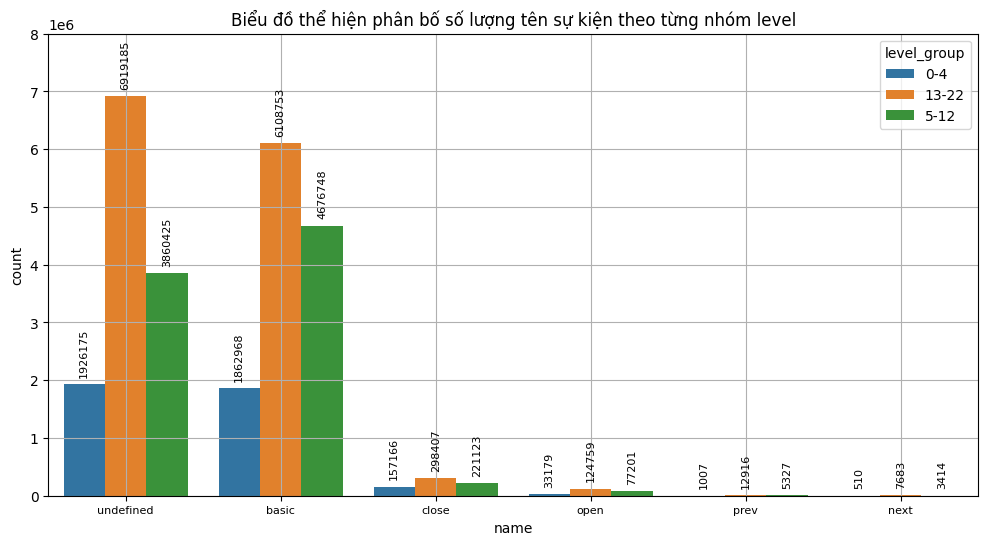

In [25]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.countplot(data = raw_train_df, x = 'name', hue = 'level_group', order = raw_train_df['name'].value_counts().index, ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 8)
ax.bar_label(ax.containers[0], rotation = 90, fontsize = 8, fmt = '%.f', padding = 5)
ax.bar_label(ax.containers[1], rotation = 90, fontsize = 8, fmt = '%.f', padding = 5)
ax.bar_label(ax.containers[2], rotation = 90, fontsize = 8, fmt = '%.f', padding = 5)
plt.grid()
plt.ylim(0, 8e6)
plt.title('Biểu đồ thể hiện phân bố số lượng tên sự kiện theo từng nhóm level')
plt.show()

Ở đây ta sẽ làm rõ ý nghĩa của từng tên sự kiện như sau:
- **basic** - các sự kiện cơ bản
- **undefined** - các sự kiện không xác định
- **close** - các sự kiện đóng (ví dụ: đóng notebook, đóng bản đồ, ...)
- **open** - các sự kiện mở (ví dụ: mở notebook)
- **prev** - các sự kiện chuyển về trang trước đó trong notebook (chỉ dành cho các sự kiện có liên quan đến notebook)
- **next** - các sự kiện chuyển sang trang tiếp theo trong notebook (chỉ dành cho các sự kiện có liên quan đến notebook)

**Nhận xét:** Quan sát biểu đồ trên, ta nhận thấy rằng phân bố của sự kiện không xác định "undefined" chiếm nhiều nhất so với các sự kiện còn lại. Nói cách khác, sự kiện "undefined" có khoảng **12,705,785** mẫu, sự kiện "basic" có khoảng **12,648,469** mẫu, sự kiện "close" có khoảng **676,696** mẫu, sự kiện "open" có khoảng **235,139** mẫu, sự kiện "prev" có khoảng **19,250** mẫu và sự kiện chiếm ít nhất là sự kiện "next" có khoảng **11,607** mẫu. Điều này cho thấy có khá nhiều sự kiện không xác định được khi học sinh điều hướng trong trò chơi, trong khi việc đóng mở sẽ xảy ra thường xuyên khi tương tác với notebook hoặc bản đồ, cuối cùng là các sự kiện "prev" và "next" hiếm khi xảy ra, vì hầu hết học sinh không hoàn thành hết các chương trong trò chơi.

Cuối cùng, ta sẽ dùng các biểu đồ cột cho từng loại sự kiện trên để thể hiện sự phân bố theo level. Trong đó:
- Trục hoành: thể hiện các level xảy ra của sự kiện **(level)**.
- Trục tung: thể hiện số lượng theo từng level.

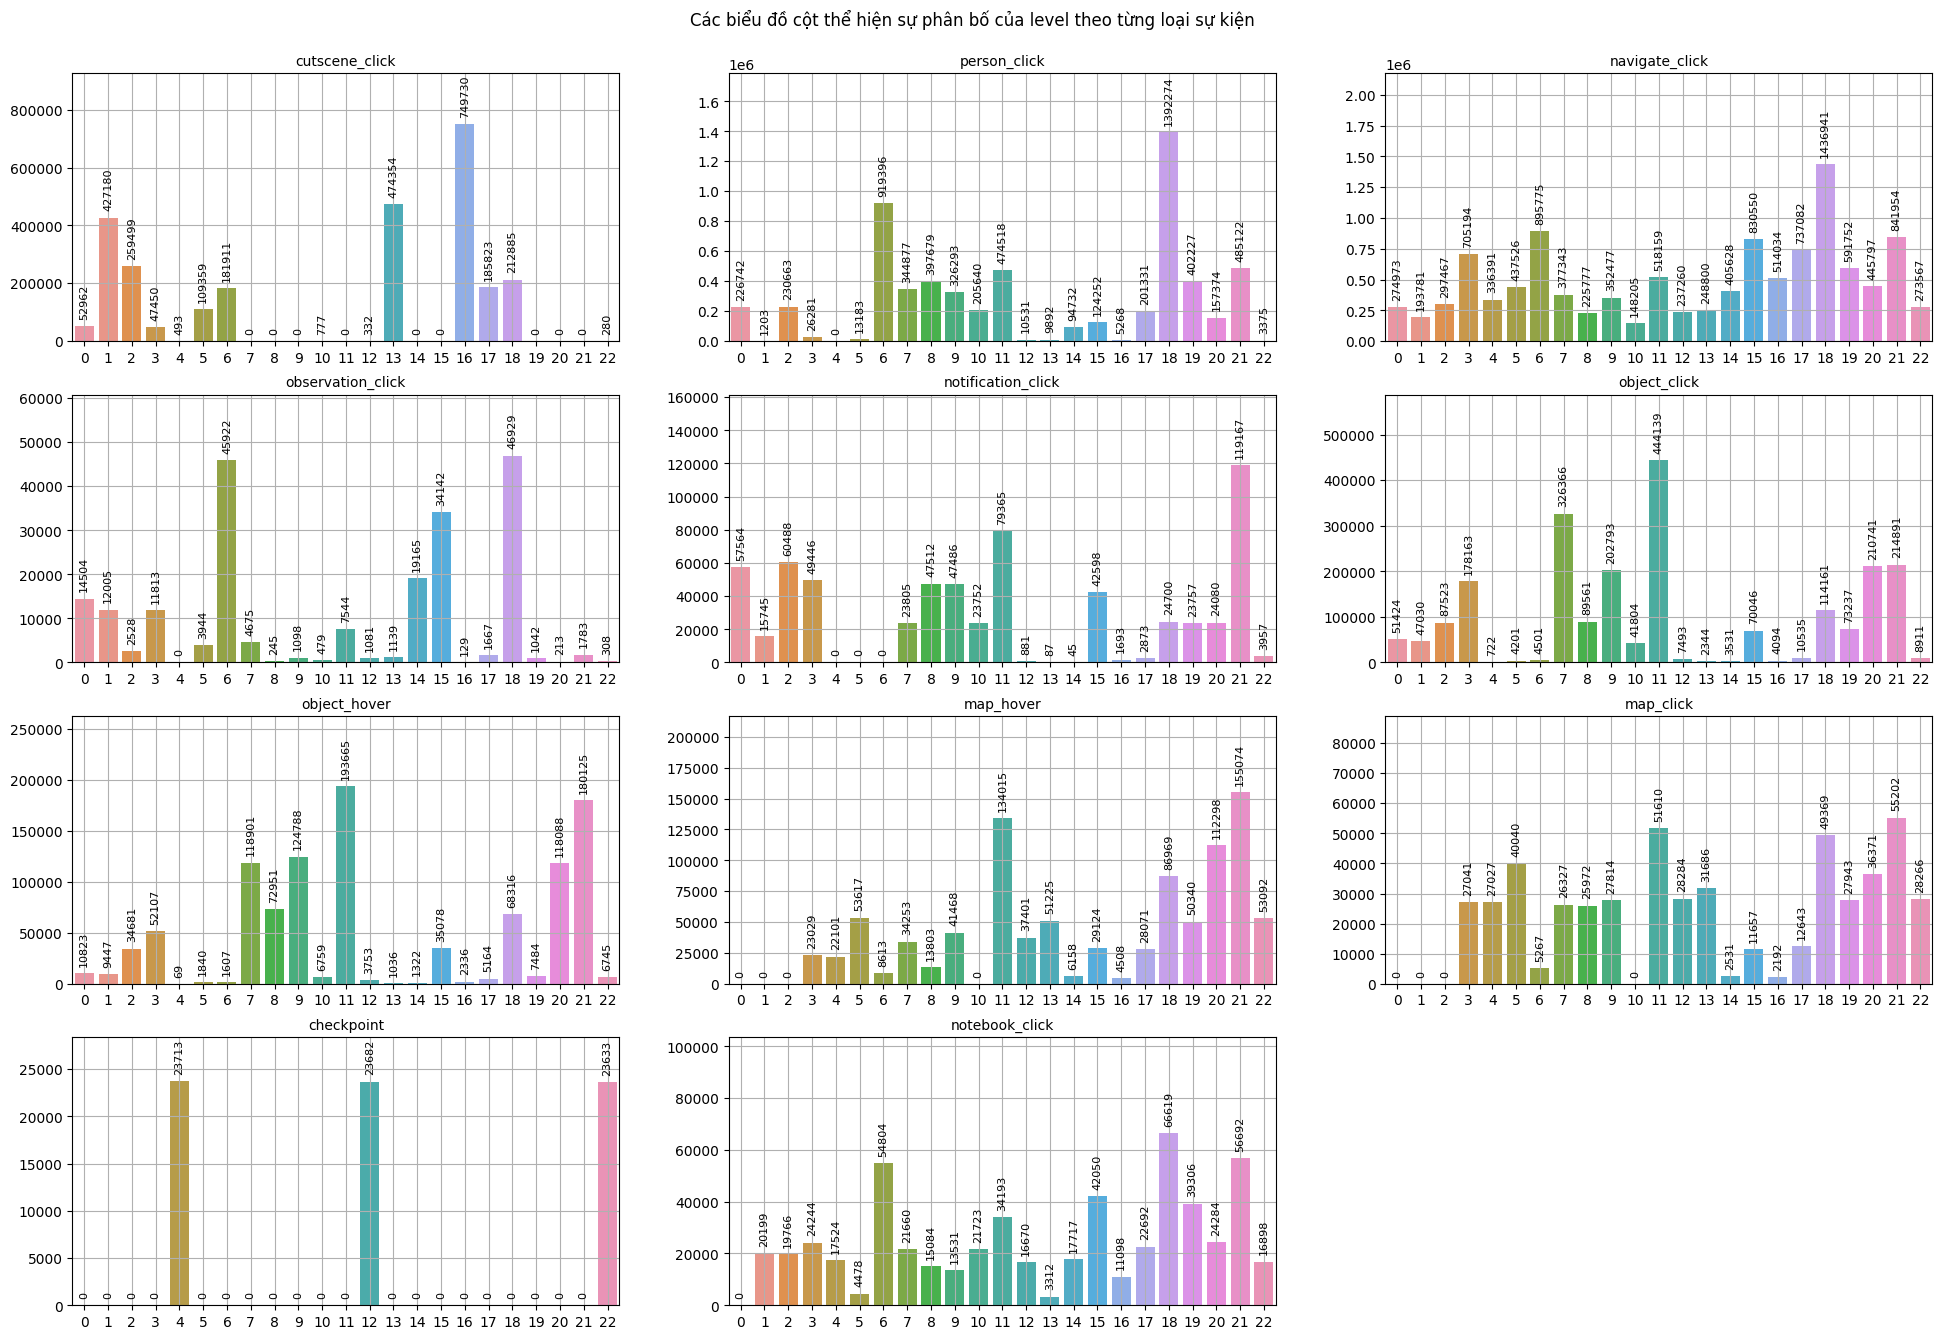

In [26]:
fig, axs = plt.subplots(4, 3, figsize = (24, 16))
row, col = 0, 0
for event_name in categorical_col_df['unique']['event_name']:
  event_df = raw_train_df[raw_train_df['event_name'] == event_name]
  sns.countplot(data = event_df, x = 'level', ax = axs[row, col])
  axs[row, col].grid()
  axs[row, col].set_xlabel('')
  axs[row, col].set_ylabel('')
  axs[row, col].set_title(event_name, fontsize = 10)
  axs[row, col].bar_label(axs[row, col].containers[0], rotation = 90, fontsize = 8, fmt = '%.f', padding = 5)
  axs[row, col].set_ylim(0, event_df['level'].value_counts().values[0] + np.mean(event_df['level'].value_counts().values) * 1.5)
  col += 1
  if col >= 3:
    col = 0
    row += 1
plt.suptitle('Các biểu đồ cột thể hiện sự phân bố của level theo từng loại sự kiện', y = 0.92)
fig.delaxes(axs[3, 2])
plt.show()

**Nhận xét:** Quan sát các biểu đồ trên, ta nhận thấy được một số điểm nổi bật sau:
- Các sự kiện có liên quan đến bản đồ như "map_hover" và "map_click" không có ý nghĩa đối với 3 mức level đầu tiên (0-1-2). Điều này cho thấy ở 3 level đầu tiên, người chơi chưa cần sử dụng tới công cụ này hoặc chưa mở khóa được công cụ này, bắt đầu từ level 4 trở đi (cũng chính là level cuối của nhóm level thứ nhất (0-4)), người chơi mới được mở rộng các địa điểm khám phá khác và lúc này công cụ bản đồ mới thực sự được cần quan tâm tới.
- Sự kiện "checkpoint" chỉ có xuất hiện giá trị ở level 4, level 12 và level 22. Điều này cũng dễ hiểu vì các sự kiện này chỉ xuất hiện sau khi kết thúc một nhóm level, tức là tương ứng với level 4 là level cuối cùng của nhóm level thứ nhất (0-4), tương ứng với level 12 là level cuối cùng của nhóm level thứ hai (5-12) và tương ứng với level 22 là level cuối cùng của nhóm level thứ ba (13-22). Ngoài ra về phân bố số lượng của level theo sự kiện "checkpoint" cũng khá đều ở 3 level trên (khoảng **~23,000** mẫu)
- Hầu hết sự kiện "navigate_click" xảy ra xuyên suốt trò chơi, do vậy phân bố số lượng của level theo sự kiện này cũng trải đều ở các level trò chơi. Level có nhiều sự kiện nhất theo từng loại sự kiện là: "cutscene_click" có **749,730** mẫu thuộc level 16, "person_click" có **1,392,274** mẫu thuộc level 18, "navigate_click" có **1,436,941** mẫu thuộc level 18, "observation_click" có **46,929** mẫu thuộc level 18, "notification_click" có **119,167** mẫu thuộc level 21, "object_click" có **444,139** mẫu thuộc level 11, "object_hover" có **193,665** mẫu thuộc level 11, "map_hover" có **155,074** mẫu thuộc level 21, "map_click" có **55,202** mẫu thuộc level 21, "notebook_click" có **66,619** mẫu thuộc level 18. Như vậy level 18 có lẽ là một level khó đối với hầu hết người chơi, dẫn tới các sự kiện xảy ra ở level này xuất hiện khá nhiều.
- Ở 3 mức level 4-5-6, các sự kiện như "notification_click", "object_click", "object_hover" thường không có giá trị hoặc số lượng giá trị ít, có thể trọng tâm ở các level này không phải tương tác với các sự kiện liên quan tới đồ vật hoặc những thứ tương tự.

### Các insight về tập dữ liệu

Từ các khám phá và phân tích về tập dữ liệu ở trên, ta có thể rút ra được các kết luận tổng quan như sau:
- Bằng hình thức giáo dục theo kiểu trò chơi trực tuyến như trên, người học thường không mất quá nhiều thời gian để tham gia mà vẫn đảm bảo cung cấp đủ lượng kiến thức cần thiết. Việc này đòi hỏi người học cần phải tập trung theo dõi từng chi tiết của trò chơi mới đạt hiệu suất học tập cao, tuy nhiên hầu hết lại không có quá nhiều học sinh hoàn thành hết toàn bộ các chương của trò chơi.
- Việc tương tác với trò chơi cũng nên được đơn giản hóa cho người học, đơn giản vì đối tượng người học ở đây hầu hết là những đứa trẻ từ lớp 3-5.
- Các manh mối của trò chơi nên bắt đầu từ mức độ dễ lồng ghép với sự hướng dẫn từ các nhân vật trò chơi, người học mới có thể làm quen dần với cách chơi và cách điều khiển. Sau đó có thể nâng độ khó của trò chơi lên để tạo sự thách thức. Ngoài ra, sau mỗi hành trình khám phá ở một địa điểm nào đó, cần cho người học kiểm tra lại những kiến thức đã thu thập được bằng một số câu hỏi ngắn, từ đó mới đánh giá đúng đắn về hiệu suất học tập của học sinh.
- Để tăng thêm trải nghiệm của người học, trò chơi nên được bố trí thêm nhạc nền, âm thanh, tiếng động,... đồ họa hay kích thước màn hình trò chơi cũng là một yếu tố phụ giúp tăng thêm trải nghiệm trò chơi, tuy nhiên không được quá chú trọng.

## E. TÀI LIỆU THAM KHẢO

- [1] Nguồn dữ liệu được lấy từ một cuộc thi trên Kaggle: https://www.kaggle.com/competitions/predict-student-performance-from-game-play
- [2] Slide và bài giảng của thầy Lê Ngọc Thành.